# n Choose k and Stirling's approximation

In this section we want to write a python script that returns the value for $\binom{n}{k}$ and compares it to **Stirling's approximation**<br>
<br>
$n! \approx \sqrt{2\pi\,n}\left(\frac{n}{\it{e}}\right)^n$<br>
<br>
which leads to an [upper and lower estimate](https://en.wikipedia.org/wiki/Stirling%27s_approximation) for $\binom{n}{k}$:<br>
<br>
$ \left(\frac{n}{k}\right)^k\, \le \, \binom{n}{k}\, \le \, \left(\frac{\it{e}\, n}{k}\right)^k$<br>
<br>
Stirling's approximation is used quite frequently in statistics and for numerical approximations for large $n$.

The learning goals are:<br>
- getting an idea of the dynamic range of $\binom{n}{k}$
- repeating python syntax: using $def$ and $lambda$
- repeating laws of log

The exaxct value of $\binom{n}{k}$ can be calculated using $comb$ from the $math$ library. Therefore, we are loading the corresponding packages (including $numpy$ and $matplotlib$): 

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

n_choose_k = math.comb

<br>

**1) N Factorial**

We also need to calculate $k!$. This can be done using $math.factorial$. First, we want to get an idea how fast these values grow and we want to compare the exact value to Stirlings approximation:

In [3]:
N = np.arange(1,100)

In [4]:
NFac = lambda N: [(math.factorial(n), np.exp(0.5*np.log(2*np.pi) + (n+0.5)*np.log(n) - n)) for n in N] 

Note: make sure, that you understand that<br>
<br>
$\ln{\left[\sqrt{2\pi\,n}\left(\frac{n}{\it{e}}\right)^n\right]} = \frac{1}{2}\ln{2\pi} + \left(1+\frac{1}{2}\right)\ln{n}-n$<br>
<br>
and why I have used it for the function above, and then performed $\it{e}^{\ln{\left[\sqrt{2\pi\,n}\left(\frac{n}{\it{e}}\right)^n\right]}}$ instead of using it directly! 

<br>

Now, we like to plot the values:

In [5]:
Result = np.array(NFac(N))

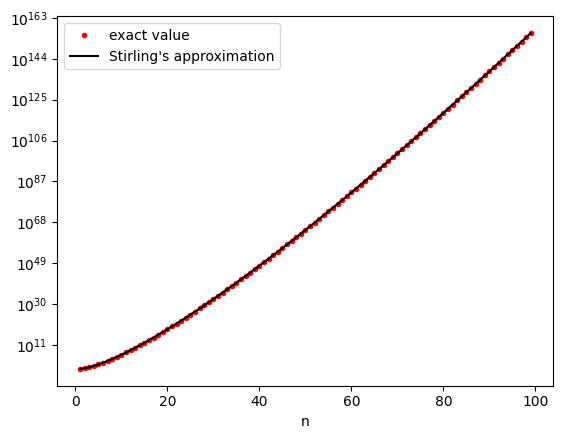

In [6]:
plt.plot(N, Result[:,0], '.', label = 'exact value', c = 'r')
plt.plot(N, Result[:,1], '-', label = "Stirling's approximation", c = 'k')
plt.legend()
plt.yscale('log')
plt.xlabel('n')
plt.show()

The approximation seems reasonable. Also note, how fast the values grow. **Could that lead to numerical issues?**<br> 
The plot is shown in log-scale, but log-scale can trick your mind. Therefore, it makes more sense to plot the relative error:

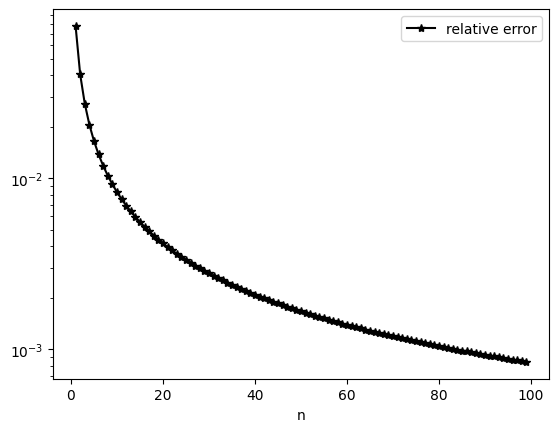

In [7]:
plt.plot(N, (Result[:,0]-Result[:,1])/Result[:,0], '*-', label = 'relative error', c = 'k')
plt.legend()
plt.yscale('log')
plt.xlabel('n')
plt.show()

Already for moderadely large $n$, Stirling's approximation is very accurate! 

<br>

**2) N Choose K**

As before, we want to visualize Stirling's approximation, but applied to $\binom{n}{k}$, [which leads to](https://en.wikipedia.org/wiki/Stirling%27s_approximation)<br>
<br>
$ \left(\frac{n}{k}\right)^k\, \le \, \binom{n}{k}\, \le \, \left(\frac{\it{e}\, n}{k}\right)^k$<br>
<br>

First, we write a function that performs the calculation for one $n$ and one $k$...

In [8]:
K = [2, 4, 6]
N = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 100000, int(1e+6)]

In [9]:
def n_choose_k_vs_Stirling(n, k):
    
    exact      = n_choose_k(n,k)
    
    approx_hig = np.exp(k + k*np.log(n) - k*np.log(k))
    approx_low = np.exp(    k*np.log(n) - k*np.log(k))
    
    return exact, approx_hig, approx_low 

...and then define a function using $lambda$ that iterates over $N$ for a given $k$. 

In [10]:
N_choose_K_vs_Stirling = lambda N, k: [n_choose_k_vs_Stirling(n, k) for n in N]

Finally, we plot the results:

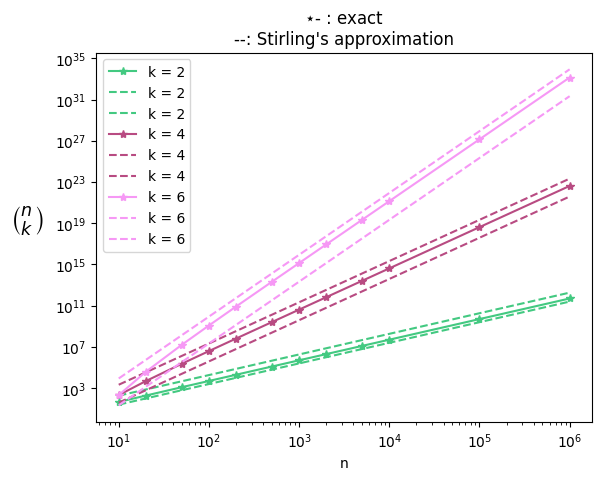

In [11]:
for k in K:
    col    = np.random.uniform(0,1,3)
    Result = np.array(N_choose_K_vs_Stirling(N,k))
    plt.plot(N, Result[:,0], '*-', label = 'k = ' + str(k), c = col)
    plt.plot(N, Result[:,1], '--', label = 'k = ' + str(k), c = col)
    plt.plot(N, Result[:,2], '--', label = 'k = ' + str(k), c = col)
    
plt.title(r"$\star$- : exact" +'\n'+ "--: Stirling's approximation" )
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel(r'$\binom{n}{k}$', rotation = 0, fontsize = 18, labelpad = 20)
plt.show()

We see that both approximations (upper and lower estimate) become more accurate for large $n$, but that stronly depends on $k$. Note that the diagram is in log-scale, the approximations are an **order of magnitude** estimations! 